In [1]:
from pdesign import canvas, shapes, lines
from pdesign import transforms as trans
import numpy as np
from shapely.geometry import MultiLineString, LineString, Point, Polygon, MultiPoint
from shapely.ops import unary_union
import matplotlib.pyplot as plt

from shapely.geometry import box as Box
from shapely import affinity

In [2]:
linewidth = 0.01771654*72
picture = canvas.Canvas(paper_size=(11,14), margin_percent=0.0, origin='corner')

dp = {
    "alpha":0.7,
    "linewidth":0.45*0.0393701*72,
    "clear":False,
}

picture_bbox = Box(picture.bbox[0,0], picture.bbox[0,1], picture.bbox[1,0], picture.bbox[1,1])

<Figure size 792x1008 with 0 Axes>

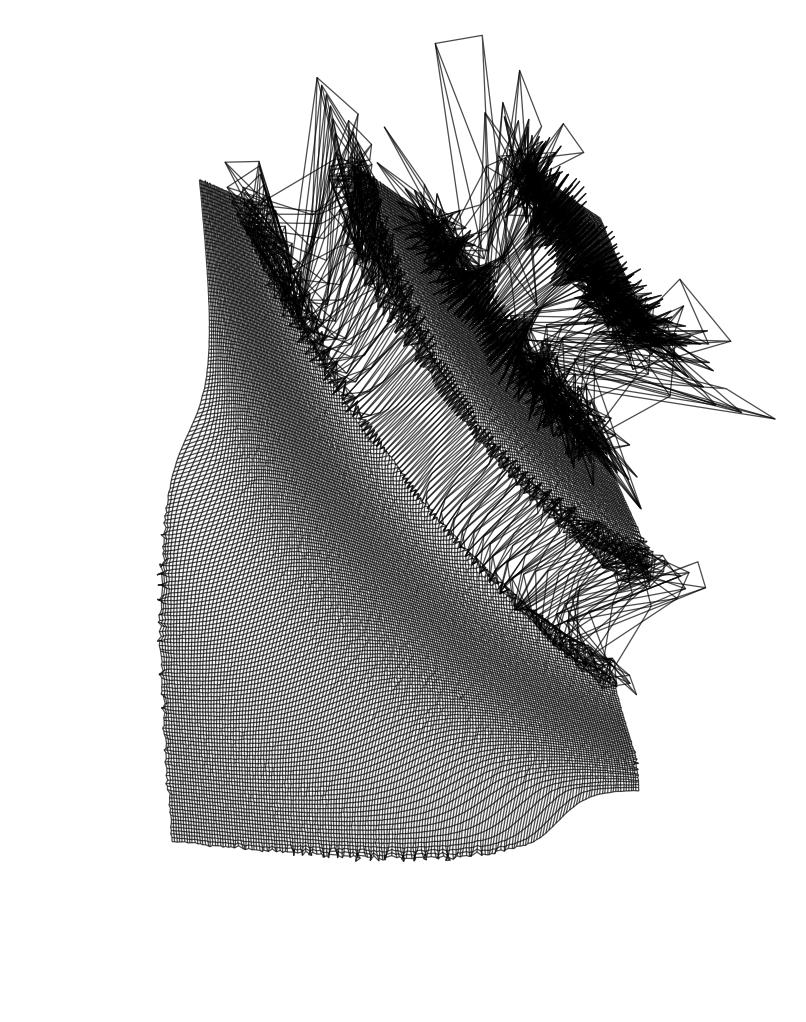

In [8]:
size = 175

m = 2

x, y = np.meshgrid(np.linspace(m, 11-m, size), np.linspace(m, 14-m, size), indexing='ij')

delta = 0.25
noise = 1e-3
for _ in range(75):

    f = 0.35*np.cos(0.2*x*y)  + .1

    dx, dy = np.gradient(f) + np.random.uniform(-noise, noise, f.shape)

    x += delta*dx
    y += delta*dy


grid = []

for i in range(size):
    
    l = np.dstack([x[i], y[i]])[0][::(-1)**i]
    grid.append(LineString(l))
    
    
    l = np.dstack([x[:, i], y[:, i]])[0][::(-1)**i]
    grid.append(LineString(l))
    
    
grid = MultiLineString(grid)
grid = affinity.scale(grid, 0.9, 0.9, origin=(11/2, 7))


picture.make_canvas()
picture.plot_shapes([grid], **dp)
picture.display_overlays(False)
#picture.add_grid(11, 14)
picture.fig.savefig("glitch_cloth.svg")
picture.fig